In [170]:
# simulate a flux limited, and non-flux limited radio and IR survey
# from luminosity functions

In [303]:
import numpy as np
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt

In [304]:
import sys # needed to import cat_utils
sys.path.insert(0, '/Users/abrahamn/21cmIR/21cmIRxcor/')

import imp
import cat_utils
imp.reload(cat_utils)

<module 'cat_utils' from '/Users/abrahamn/21cmIR/21cmIRxcor/cat_utils.pyc'>

In [317]:
numPbins = 50
Pmin,Pmax = 1.e19,1.e24
P_sf = 10.**np.linspace(np.log10(Pmin),np.log10(Pmax),numPbins+1)
dp_sf = P_sf[1:]-P_sf[:-1]
P0 = 1.e19
def rho_P(P):
    return 1.e-22*(P/P0)**(-2.)*(Pmin<=P)*(P<=Pmax)

In [318]:
zmax = .5
c_over_H0 = 4283. # Mpc
los_min_Mpc,los_max_Mpc = 20.,c_over_H0*zmax
Mpc2m = 1.e6*3.e16

In [319]:
L1_vals_per_bin = []
dist_vals_per_bin = []

for i in range(numPbins):
    mean_num_objects_in_bin = rho_P(P_sf[i])*dp_sf[i]*trans_Mpc**2*(los_max_Mpc-los_min_Mpc)
    num_objects_in_bin = np.random.poisson(mean_num_objects_in_bin)
    dists_Mpc = np.random.uniform(los_min_Mpc,los_max_Mpc,num_objects_in_bin)
    
    jy_vals = P_sf[i]/(4.*np.pi*(dists_Mpc*Mpc2m)**2)/1.e-29

    L1_vals_per_bin.append(P_sf[i]+np.zeros(num_objects_in_bin))
    dist_vals_per_bin.append(dists_Mpc)

    print('%d objects in L=%e bin'%(num_objects_in_bin,P_sf[i]))

L1_vals = np.concatenate(L1_vals_per_bin).flatten()
dist_vals = np.concatenate(dist_vals_per_bin).flatten()

print('using %d sources'%(len(L1_vals)))

306898 objects in L=1.000000e+19 bin
244292 objects in L=1.258925e+19 bin
192950 objects in L=1.584893e+19 bin
153959 objects in L=1.995262e+19 bin
122456 objects in L=2.511886e+19 bin
97136 objects in L=3.162278e+19 bin
77749 objects in L=3.981072e+19 bin
61167 objects in L=5.011872e+19 bin
48880 objects in L=6.309573e+19 bin
38790 objects in L=7.943282e+19 bin
30779 objects in L=1.000000e+20 bin
24572 objects in L=1.258925e+20 bin
19488 objects in L=1.584893e+20 bin
15317 objects in L=1.995262e+20 bin
12008 objects in L=2.511886e+20 bin
9592 objects in L=3.162278e+20 bin
7689 objects in L=3.981072e+20 bin
6130 objects in L=5.011872e+20 bin
4935 objects in L=6.309573e+20 bin
3803 objects in L=7.943282e+20 bin
3001 objects in L=1.000000e+21 bin
2454 objects in L=1.258925e+21 bin
1949 objects in L=1.584893e+21 bin
1549 objects in L=1.995262e+21 bin
1291 objects in L=2.511886e+21 bin
963 objects in L=3.162278e+21 bin
806 objects in L=3.981072e+21 bin
634 objects in L=5.011872e+21 bin
498

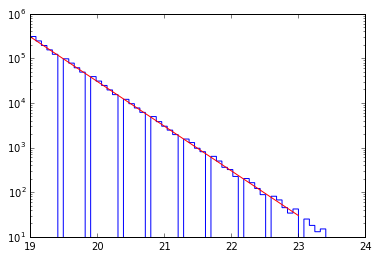

In [331]:
a=plt.hist(np.log10(L1_vals),60,histtype='step')
plt.gca().set_yscale('log')
plt.plot(np.linspace(19,23),(10.**np.linspace(19,23))**(-2+1)*3e24,'r')
#plt.ylim([0,100000])

/Users/abrahamn/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:3: RuntimeWarning: divide by zero encountered in power
  app.launch_new_instance()


(11628.716412789583, 100000)

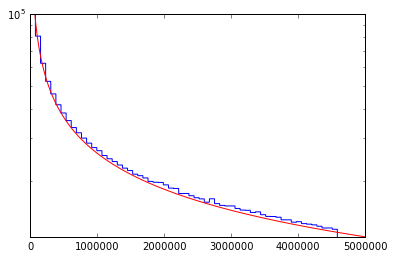

In [346]:
a=plt.hist(dist_vals**2,60,histtype='step')
plt.gca().set_yscale('log')
plt.plot(np.arange(0,5.e6,1.e3),2.6e7*np.arange(0,5.e6,1.e3)**(-.5),'r')
plt.ylim([0,100000])

In [335]:
# L2_vals = np.random.choice(a=P_sf,size=len(L1_vals),p=phi_sf_in_bins/np.sum(phi_sf_in_bins),replace=True)

In [336]:
F1_vals = L1_vals/(4.*np.pi*(dist_vals*Mpc2m)**2)/1.e-29
# F2_vals = L2_vals/(4.*np.pi*(dist_vals*Mpc2m)**2)/1.e-29

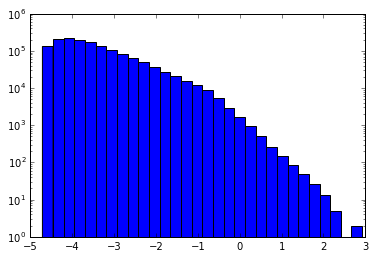

In [338]:
plt.hist(np.log10(F1_vals),30)
plt.gca().set_yscale('log')

In [392]:
alpha0,alpha1 = los_min_Mpc**2,los_max_Mpc**2
num_alpha = 50
alpha_edges = 10.**np.linspace(np.log10(alpha0),np.log10(alpha1),num_alpha+1)
dalpha = alpha_edges[1:]-alpha_edges[:-1]
alpha = .5*(alpha_edges[1:]+alpha_edges[:-1])

In [393]:
numF = 50
Fedges = 10.**np.linspace(-5,3,numF+1)
dF = Fedges[1:]-Fedges[:-1]
F = .5*(Fedges[1:]+Fedges[:-1])

In [394]:
rho_F = np.zeros(numF)
for i in range(numF):
    for alphai in range(num_alpha):
        L = 1.e-29*4*np.pi*F[i]*alpha[alphai]*Mpc2m**2
        rho_F[i] += dalpha[alphai]*alpha[alphai]**.5*rho_P(L)*dF[i]

/Users/abrahamn/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:4: RuntimeWarning: divide by zero encountered in log10


(-6, 3)

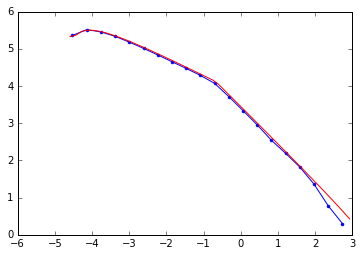

In [395]:
hist,bin_edges = np.histogram(np.log10(1.e29*L1_vals/(4*np.pi*Mpc2m**2*dist_vals**2)),20)
bin_centers = .5*(bin_edges[1:]+bin_edges[:-1])
plt.plot(bin_centers,np.log10(hist),'b.-')
plt.plot(np.log10(F),np.log10(rho_F)+23,'r')
plt.xlim([-6,3])
#plt.ylim([0,7])